# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('GermanCredit.csv.zip')
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
# Your code here! :)

# Split the data into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
# Fit the model to the training data
clf = clf.fit(X_train, y_train)

In [4]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.44      0.46      0.45        91
        Good       0.76      0.74      0.75       209

    accuracy                           0.66       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.66      0.66      0.66       300



In [5]:
# Define the hyperparameters to tune
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}

# Perform Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the final model on the testing set
y_pred = best_model.predict(X_test)

# Print classification report for the final evaluation
print("Final Model Evaluation on Test Set:")
print(classification_report(y_test, y_pred))

Final Model Evaluation on Test Set:
              precision    recall  f1-score   support

         Bad       0.44      0.31      0.36        91
        Good       0.73      0.83      0.78       209

    accuracy                           0.67       300
   macro avg       0.59      0.57      0.57       300
weighted avg       0.64      0.67      0.65       300



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
# ! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

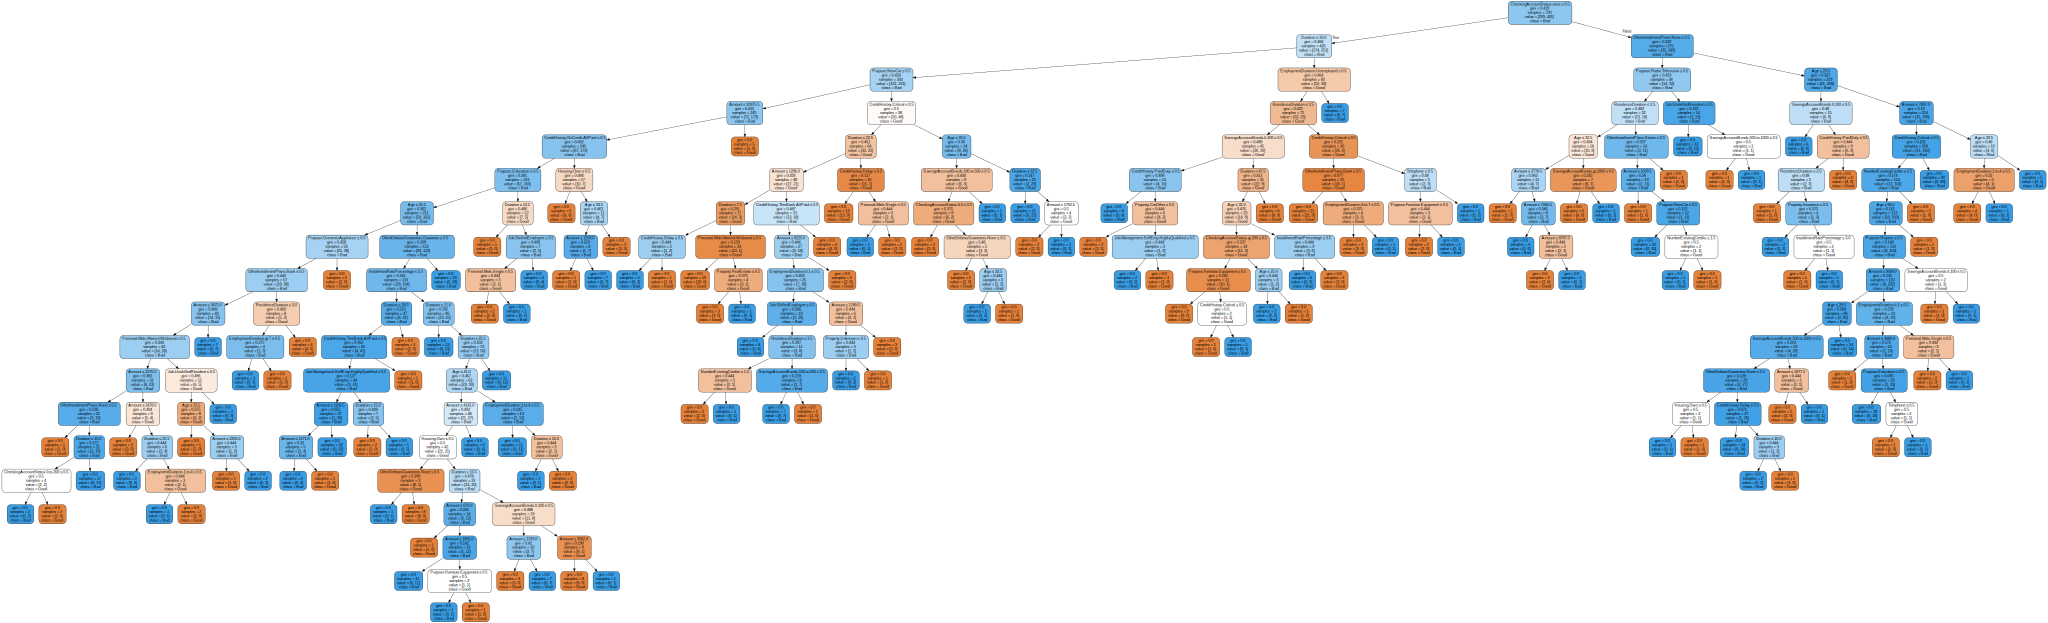

In [10]:
from sklearn import tree
import graphviz

feature_names = X.columns
class_names = df['Class'].unique()
target_name = 'Class'

dot_data = tree.export_graphviz(clf, 
                  feature_names=feature_names,  
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

In [7]:
# Save  decisoin tree as PNG
graph.format = "png"
graph.render("Decision_Tree")


(process:30628): GLib-GIO-WARNING **: 21:42:48.018: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22091.10041.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


'Decision_Tree.png'

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly they have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Your code here! :)

from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier object
rf_clf = RandomForestClassifier()

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model's performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

         Bad       0.70      0.36      0.48        91
        Good       0.77      0.93      0.84       209

    accuracy                           0.76       300
   macro avg       0.74      0.65      0.66       300
weighted avg       0.75      0.76      0.73       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

**Feature Importances using MDI**

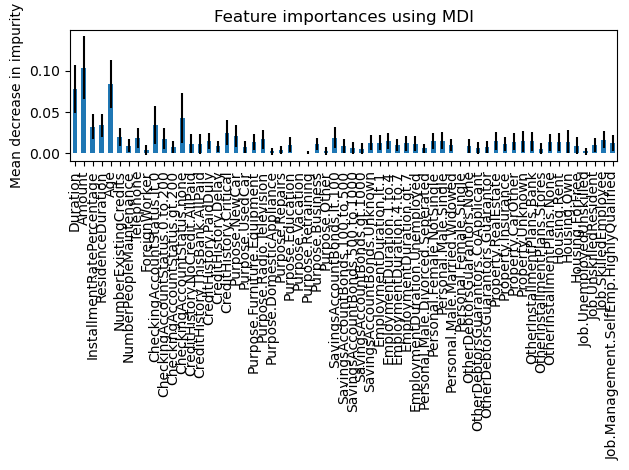

In [11]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Feature Importances using Permutation on Full Model**

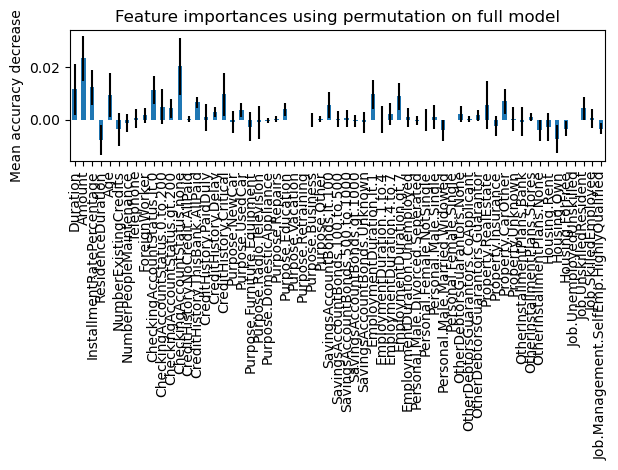

In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
# ! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

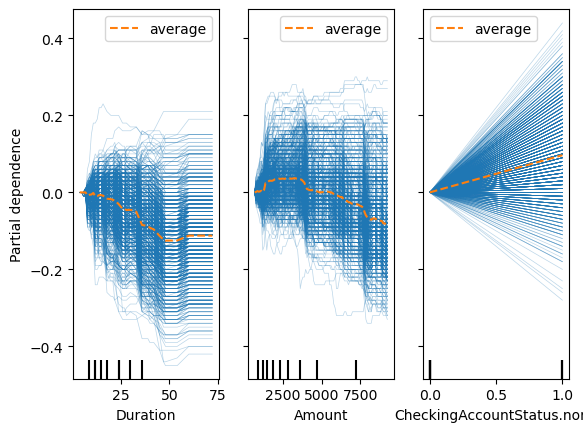

In [13]:
# Your code here!
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

features = ['Duration', 'Amount', 'CheckingAccountStatus.none']

# Create PDP plots for each selected feature
PartialDependenceDisplay.from_estimator(rf_clf, X, features,kind='both', centered=True)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research and industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
# ! conda install -c anaconda py-xgboost

In [ ]:
# ! conda install -c conda-forge catboost

In [ ]:
# ! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

In [15]:
# Convert the target variable to numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train each model
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    results[model_name] = accuracy

Learning rate set to 0.008847
0:	learn: 0.6896949	total: 150ms	remaining: 2m 30s
1:	learn: 0.6859378	total: 158ms	remaining: 1m 18s
2:	learn: 0.6822440	total: 164ms	remaining: 54.5s
3:	learn: 0.6790305	total: 169ms	remaining: 42s
4:	learn: 0.6745593	total: 172ms	remaining: 34.3s
5:	learn: 0.6716149	total: 176ms	remaining: 29.2s
6:	learn: 0.6684704	total: 179ms	remaining: 25.4s
7:	learn: 0.6652340	total: 182ms	remaining: 22.6s
8:	learn: 0.6618677	total: 185ms	remaining: 20.4s
9:	learn: 0.6598491	total: 189ms	remaining: 18.7s
10:	learn: 0.6570160	total: 191ms	remaining: 17.2s
11:	learn: 0.6543308	total: 194ms	remaining: 16s
12:	learn: 0.6515283	total: 197ms	remaining: 14.9s
13:	learn: 0.6489191	total: 199ms	remaining: 14s
14:	learn: 0.6455112	total: 202ms	remaining: 13.3s
15:	learn: 0.6429218	total: 205ms	remaining: 12.6s
16:	learn: 0.6401674	total: 208ms	remaining: 12s
17:	learn: 0.6379353	total: 212ms	remaining: 11.6s
18:	learn: 0.6352756	total: 215ms	remaining: 11.1s
19:	learn: 0.6326

220:	learn: 0.4165238	total: 789ms	remaining: 2.78s
221:	learn: 0.4158462	total: 792ms	remaining: 2.78s
222:	learn: 0.4152912	total: 795ms	remaining: 2.77s
223:	learn: 0.4146836	total: 798ms	remaining: 2.76s
224:	learn: 0.4140839	total: 801ms	remaining: 2.76s
225:	learn: 0.4133431	total: 805ms	remaining: 2.75s
226:	learn: 0.4126190	total: 809ms	remaining: 2.75s
227:	learn: 0.4119463	total: 812ms	remaining: 2.75s
228:	learn: 0.4115678	total: 815ms	remaining: 2.74s
229:	learn: 0.4109297	total: 818ms	remaining: 2.74s
230:	learn: 0.4103030	total: 821ms	remaining: 2.73s
231:	learn: 0.4098860	total: 823ms	remaining: 2.72s
232:	learn: 0.4094331	total: 826ms	remaining: 2.72s
233:	learn: 0.4089113	total: 828ms	remaining: 2.71s
234:	learn: 0.4083962	total: 830ms	remaining: 2.7s
235:	learn: 0.4078394	total: 833ms	remaining: 2.7s
236:	learn: 0.4072233	total: 836ms	remaining: 2.69s
237:	learn: 0.4067646	total: 838ms	remaining: 2.68s
238:	learn: 0.4063908	total: 841ms	remaining: 2.68s
239:	learn: 0.

436:	learn: 0.3267149	total: 1.38s	remaining: 1.78s
437:	learn: 0.3264954	total: 1.38s	remaining: 1.77s
438:	learn: 0.3263240	total: 1.39s	remaining: 1.77s
439:	learn: 0.3261131	total: 1.39s	remaining: 1.76s
440:	learn: 0.3257520	total: 1.39s	remaining: 1.76s
441:	learn: 0.3253044	total: 1.39s	remaining: 1.76s
442:	learn: 0.3249628	total: 1.4s	remaining: 1.75s
443:	learn: 0.3246276	total: 1.4s	remaining: 1.75s
444:	learn: 0.3243827	total: 1.4s	remaining: 1.75s
445:	learn: 0.3240570	total: 1.41s	remaining: 1.75s
446:	learn: 0.3238377	total: 1.41s	remaining: 1.74s
447:	learn: 0.3235009	total: 1.41s	remaining: 1.74s
448:	learn: 0.3230007	total: 1.41s	remaining: 1.74s
449:	learn: 0.3224496	total: 1.42s	remaining: 1.73s
450:	learn: 0.3220311	total: 1.42s	remaining: 1.73s
451:	learn: 0.3216716	total: 1.42s	remaining: 1.73s
452:	learn: 0.3214604	total: 1.43s	remaining: 1.72s
453:	learn: 0.3211409	total: 1.43s	remaining: 1.72s
454:	learn: 0.3205719	total: 1.43s	remaining: 1.72s
455:	learn: 0.3

619:	learn: 0.2739472	total: 1.96s	remaining: 1.2s
620:	learn: 0.2737298	total: 1.96s	remaining: 1.2s
621:	learn: 0.2734199	total: 1.97s	remaining: 1.2s
622:	learn: 0.2732211	total: 1.97s	remaining: 1.19s
623:	learn: 0.2729774	total: 1.97s	remaining: 1.19s
624:	learn: 0.2727652	total: 1.98s	remaining: 1.19s
625:	learn: 0.2724705	total: 1.98s	remaining: 1.18s
626:	learn: 0.2722702	total: 1.98s	remaining: 1.18s
627:	learn: 0.2719713	total: 1.99s	remaining: 1.18s
628:	learn: 0.2718005	total: 1.99s	remaining: 1.17s
629:	learn: 0.2715822	total: 1.99s	remaining: 1.17s
630:	learn: 0.2712751	total: 2s	remaining: 1.17s
631:	learn: 0.2710949	total: 2s	remaining: 1.16s
632:	learn: 0.2707476	total: 2s	remaining: 1.16s
633:	learn: 0.2704354	total: 2s	remaining: 1.16s
634:	learn: 0.2702621	total: 2.01s	remaining: 1.15s
635:	learn: 0.2700029	total: 2.01s	remaining: 1.15s
636:	learn: 0.2697250	total: 2.01s	remaining: 1.15s
637:	learn: 0.2693919	total: 2.02s	remaining: 1.14s
638:	learn: 0.2691105	total

828:	learn: 0.2262841	total: 2.55s	remaining: 525ms
829:	learn: 0.2260708	total: 2.55s	remaining: 522ms
830:	learn: 0.2259164	total: 2.55s	remaining: 519ms
831:	learn: 0.2257611	total: 2.56s	remaining: 516ms
832:	learn: 0.2256369	total: 2.56s	remaining: 513ms
833:	learn: 0.2254131	total: 2.56s	remaining: 510ms
834:	learn: 0.2250302	total: 2.56s	remaining: 507ms
835:	learn: 0.2248238	total: 2.57s	remaining: 504ms
836:	learn: 0.2245176	total: 2.59s	remaining: 504ms
837:	learn: 0.2242423	total: 2.6s	remaining: 502ms
838:	learn: 0.2240099	total: 2.6s	remaining: 499ms
839:	learn: 0.2238027	total: 2.6s	remaining: 496ms
840:	learn: 0.2235486	total: 2.61s	remaining: 493ms
841:	learn: 0.2233085	total: 2.61s	remaining: 490ms
842:	learn: 0.2230384	total: 2.61s	remaining: 487ms
843:	learn: 0.2228380	total: 2.62s	remaining: 483ms
844:	learn: 0.2226781	total: 2.62s	remaining: 480ms
845:	learn: 0.2224362	total: 2.62s	remaining: 477ms
846:	learn: 0.2222026	total: 2.62s	remaining: 474ms
847:	learn: 0.2

In [16]:
# Display the results
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df)

           Model  Accuracy
0  Decision Tree  0.690000
1  Random Forest  0.763333
2        XGBoost  0.773333
3       CatBoost  0.790000
4       LightGBM  0.796667
